In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


In [2]:
Hotel_Reviews = pd.read_csv("Hotel_Reviews.csv")
#Splitting the Categories Column by the comma
Categories = Hotel_Reviews.categories.str.split(',', expand = True)
##Transform it to DataFrame
df_Categories = pd.DataFrame(Categories)
## Changing the columns names
df_Categories.columns = ["categories_0","categories_1","categories_2","categories_3","categories_4",
             "categories_5","categories_6","categories_7","categories_8","categories_9",
             "categories_10","categories_11","categories_12","categories_13","categories_14",
             "categories_15"]
df_Categories.replace("None", "Not Informed")
#Now dropping the column "Categories" from the Hotel_Reviews dataframe
Hotel_Reviews.drop("categories", axis = 1, inplace = True)
#Joining the 2 dataframes 
Hotel_Reviews = Hotel_Reviews.join(df_Categories)
Hotel_Reviews.head()

,address,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,...,categories_6,categories_7,categories_8,categories_9,categories_10,categories_11,categories_12,categories_13,categories_14,categories_15
0,Riviera San Nicol 11/a,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,...,None,None,None,None,None,None,None,None,None,None
1,Riviera San Nicol 11/a,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,...,None,None,None,None,None,None,None,None,None,None
2,Riviera San Nicol 11/a,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,...,None,None,None,None,None,None,None,None,None,None
3,Riviera San Nicol 11/a,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,...,None,None,None,None,None,None,None,None,None,None
4,Riviera San Nicol 11/a,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,...,None,None,None,None,None,None,None,None,None,None


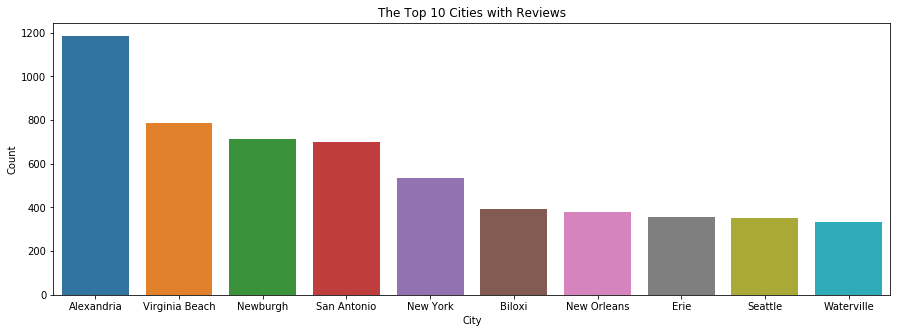

In [3]:
#Counting the ocurrences of each City on the dataframe
Hotel_Reviews_City = Hotel_Reviews["city"].value_counts()
## The line above returns a pandas series. So now we're transforming it into a DataFrame
df_Hotel_Reviews_City = pd.DataFrame(Hotel_Reviews_City)
## By doing the values_counts command we're making the Cities Name the DataFrame's index. And this may difficult our live
## when trying to plot a graph. So now we're reseting the index.
df_Hotel_Reviews_City = df_Hotel_Reviews_City.reset_index()

##Changing the columns names to make it easy to understand
df_Hotel_Reviews_City.rename(columns={"index":"City"}, inplace = True)
df_Hotel_Reviews_City.rename(columns={"city":"Count"}, inplace = True)
## Storing the value of the TOP10
df_Hotel_Reviews_City_10 = df_Hotel_Reviews_City.head(10)

figure = plt.subplots(figsize=(15,5))
sns.barplot(x="City", y="Count", data = df_Hotel_Reviews_City_10)
plt.title("The Top 10 Cities with Reviews")
plt.show()

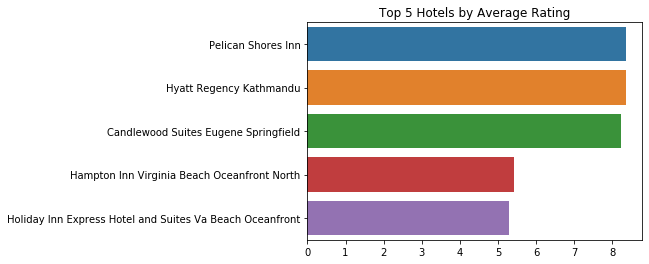

In [4]:
## Grouping the reviews rating by Hotel Name, calculating the mean and Rounding to two
Hotel_Reviews_Rating = Hotel_Reviews.groupby(["name"])["reviews.rating"].mean().round(2)
## The previous line returns a pandas series. Now we're transforming it to a DataFrame.
df_Hotel_Reviews_Rating = pd.DataFrame(Hotel_Reviews_Rating)

df_Hotel_Reviews_Rating = df_Hotel_Reviews_Rating.reset_index()
df_Hotel_Reviews_Rating.rename(columns={"reviews.rating":"Average Rating"}, inplace = True)
df_Hotel_Reviews_Rating.rename(columns={"name":"Hotel Name"}, inplace = True)

## Sorting by value DESC
df_Hotel_Reviews_Rating.sort_values(by=["Average Rating"], ascending = False, inplace = True)
df_Hotel_Reviews_Rating_5 = df_Hotel_Reviews_Rating.head(5)

sns.barplot(x="Average Rating", y="Hotel Name", data = df_Hotel_Reviews_Rating_5)
plt.title("Top 5 Hotels by Average Rating")
plt.xlabel('')
plt.ylabel('')
plt.show()


## Wordcloud For the Pelican Shores Inn

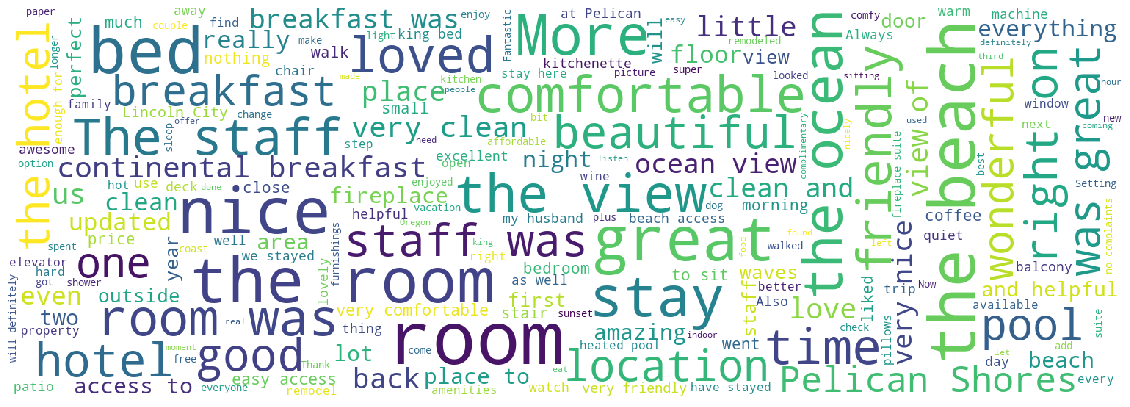

In [5]:
import re
from wordcloud import WordCloud, STOPWORDS
from os import path

## Joining the reviews for each Hotel
Hotel_Reviews_text = Hotel_Reviews.groupby(["name"])["reviews.text"].apply(lambda x: ' '.join(x.astype(str)))
df_Hotel_Reviews_text = pd.DataFrame(Hotel_Reviews_text)
Review_Pelican_Shores = df_Hotel_Reviews_text.loc["Pelican Shores Inn"]

## Now preparing the WordCloud. The stopwords are the words that may disturb our analysis, like: "a", "the". 
## For more information: https://en.wikipedia.org/wiki/Stop_words
stopwords = set(STOPWORDS)
new_words=[]
## Adding the txt file with the stopwords.
with open("stopwords.txt",'r') as f:
    [new_words.append(word) for line in f for word in line.split(" ")]
new_stopwords = stopwords.union(new_words)
## Preparing the graph with the stop_words
wordcloud = WordCloud(max_font_size=100,
                      width=1520,
                      height=535,
                      background_color = 'white',
                      stopwords = new_stopwords)

## generating the wordcloud file 
wordcloud.generate((' '.join(Review_Pelican_Shores)))
plt.figure(figsize=(20,19))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## WordCloud for the Hyatt Regency Kathmandu

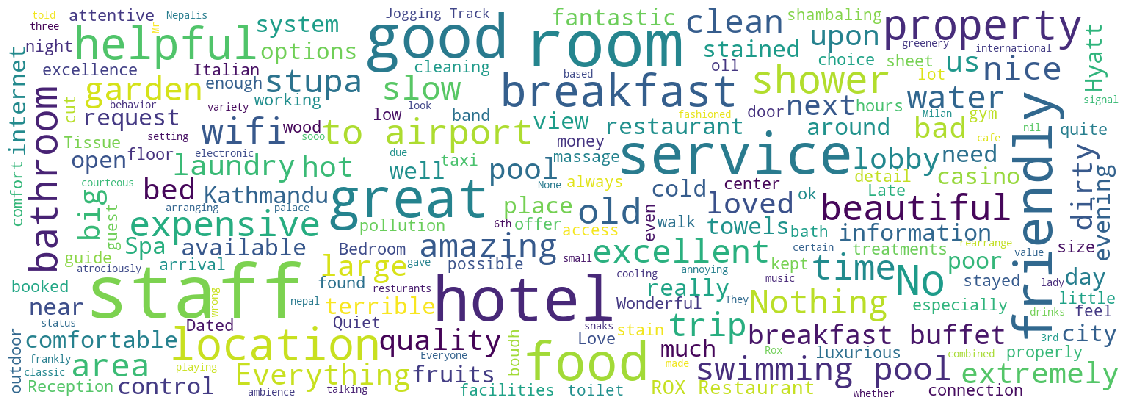

In [6]:
Review_Hyatt_Regency_Kathmandu = df_Hotel_Reviews_text.loc["Hyatt Regency Kathmandu"]

## Now preparing the WordCloud. The stopwords are the words that may disturb our analysis, like: "a", "the". 
## For more information: https://en.wikipedia.org/wiki/Stop_words
stopwords = set(STOPWORDS)
new_words=[]
## Adding the txt file with the stopwords.
with open("stopwords.txt",'r') as f:
    [new_words.append(word) for line in f for word in line.split(" ")]
new_stopwords = stopwords.union(new_words)
## Preparing the graph with the stop_words
wordcloud = WordCloud(max_font_size=100,
                      width=1520,
                      height=535,
                      background_color = 'white',
                      stopwords = new_stopwords)

## generating the wordcloud file 
wordcloud.generate((' '.join(Review_Hyatt_Regency_Kathmandu)))
plt.figure(figsize=(20,19))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## The most present province 

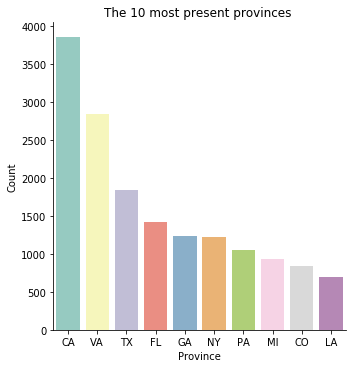

In [30]:
Hotel_Reviews_Province = Hotel_Reviews["province"].value_counts()
df_Hotel_Reviews_Province = pd.DataFrame(Hotel_Reviews_Province)

df_Hotel_Reviews_Province = df_Hotel_Reviews_Province.reset_index()
df_Hotel_Reviews_Province.rename(columns = {'province':'Count', 'index':'Province'}, inplace = True)

df_Hotel_Reviews_Province = df_Hotel_Reviews_Province.head(10)

sns.catplot(x='Province', y='Count', kind = "bar", palette = "Set3", data = df_Hotel_Reviews_Province)
plt.title("The 10 most present provinces ")
plt.show()

## Hotel Locations 

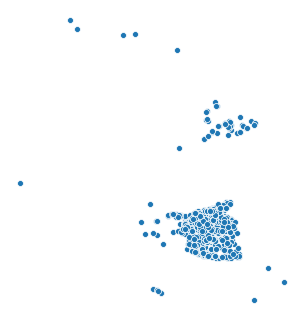

In [41]:
import gmplot

Hotel_Reviews_Locations = Hotel_Reviews.groupby(["name"])["latitude","longitude"].mean()
df_Hotel_Reviews_Locations = pd.DataFrame(Hotel_Reviews_Locations)

df_Hotel_Reviews_Locations = df_Hotel_Reviews_Locations.reset_index()

sns.relplot(x = "latitude",
            y="longitude",
            data = df_Hotel_Reviews_Locations
            )
plt.axis("off")
plt.show()

In [44]:
gmap4 = gmplot.GoogleMapPlotter.from_geocode("Dehradun, India") 


IndexError: list index out of range